# Supernovae as standard candles
Group 7: Eppacher Felix (12314883), Schallar Thomas (), Zgureanu Seph (12130595)

## 1. Scientific background
At the end of their lives, the most massive stars undergo a sudden collapse, leading to an explosion that can outshine entire galaxies — a supernova. Supernovae (SNe) are among the most powerful events in the universe. They release extreme amounts of energy and eject heavy elements into space, enriching the interstellar medium (ISM) and creating the building blocks for new star formation. Some of these heavy elements likely form only during SNe.

SNe are classified into Type I and Type II. The primary distinction between them is the absence of hydrogen (H) lines in the spectra of Type I SNe, whereas Type II SNe contain prominent H lines. [[1](#ref1)]

### Standard candles
Astronomy is largely limited to studying objects from afar, meaning astronomers can primarily observe the light an object emits. A fundamental question when discovering an object is: "How far away is it?" When distances become so large that parallax measurements are no longer useful, astronomers must rely on light to determine distance. This is where standard candles come into play.

Standard candles are astronomical objects that emit light with a known luminosity. By measuring their apparent luminosity and applying the distance modulus formula, the distance to the object can be determined:

$m-M=5\cdot\log_{10} (d) -5$

where:
- $m$ is the apparent magnitude,
- $M$ is the absolute magnitude,
- $d$ is the distance to the object in parsecs.

One example of a standard candle is Cepheid variables—pulsating stars whose brightness varies with a well-defined, stable period and amplitude. However, at greater distances, resolving individual stars within a galaxy becomes difficult, requiring the use of brighter objects. Type Ia SNe serve this purpose well. With typical peak luminosities of about $M_{B} = -19.5 \text{mag}$, they can outshine entire galaxies. [[1](#ref1)]

<img src="https://astronomy.swin.edu.au/cms/cpg15x/albums/userpics/typeia1.jpg">

https://astronomy.swin.edu.au/cosmos/T/Type+Ia+Supernova

### Supernovae Type Ia
SNe Ia are characterized by a strong ionized silicon absorption feature in their spectra. A large fraction of observed SNe Ia (~70%) exhibit remarkable homogeneity and follow a clear empirical relationship between light curve width and peak luminosity, known as the Phillips relation. These SNe Ia, commonly referred to as normal SNe Ia, have been used to determine cosmological parameters, leading to the discovery of the accelerating expansion of the universe.

SNe Ia are widely believed to result from the thermonuclear explosions of white dwarfs in binary systems. However, there is no consensus on fundamental aspects of their progenitor systems (i.e., the stars from which SNe Ia originate) or their explosion mechanisms, either from a theoretical or observational perspective. [[1](#ref1)]


<img src="https://www.schoolsobservatory.org/sites/default/files/discover/supernovaeproject/Type%20Ia.jpg">

https://www.schoolsobservatory.org/learn/astro/stars/cycle/ia_supernova

### Original idea
Type Ia SNe were first proposed as standard candles by D. Branch and G. A. Tammann in a 1992 paper. [[3](#ref3)] SNe Ia are well-suited as standard candles because they have a consistently shaped light curve and a well-defined maximum luminosity. This makes them easily distinguishable from other astronomical events and objects.

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e0/Comparative_supernova_type_light_curves.png?20120604155323">

https://commons.wikimedia.org/wiki/File:Comparative_supernova_type_light_curves.png

### Current challanges
Unfortunately, one can't simply assume that the peak luminosity of a Type Ia SN is exactly -19.5 mag and then plug in numbers into the distance modulus formula. Some Type Ia SNe shine dimmer or brighter than the standard. The brightness of the fainter SNe declines more rapidly than that of the brighter ones. Thus, Type Ia SNe are not strict standard candles, but rather standardizable candles. Various methods can be used to standardize them, turning SNe Ia into true standard candles. [[4](#ref4)]

Additionally, it is crucial to correct SNe Ia's brightness for extinction. Some SNe's light is dimmed due to interstellar dust between the SNe and the observer.

SNe Ia are widely used to determine distances to other galaxies and constrain cosmological parameters. An important assumption that scientists make is that nearby SNe are physically similar to extragalactic SNe. Nearby SNe, which are close enough for their distances to be determined using other methods, were used for distance calibration. However, it is possible that nearby SNe are part of a biased population. Such was the case with Cepheids, where nearby Cepheids were Population I stars with higher metallicity. Discovering that distant Cepheids are Population II stars (and therefore much brighter) increased both the distances and the estimated diameter of the Milky Way by around a factor of 2. Therefore, it remains an open question whether Type Ia SNe can truly be used as standard candles.

### How is data collected?
High-quality data collection on Type Ia supernovae (SNe Ia) began with the Calán/Tololo survey in the 1990s, led by Mario Hamuy and colleagues. This foundational survey provided the first systematic dataset for 29 nearby SNe Ia, using CCD photometry to measure light curves and distances up to redshifts of 0.1. Currently, the Harvard-Smithsonian Center for Astrophysics (CfA) manages one of the largest ongoing SNe Ia campaigns at the Fred Lawrence Whipple Observatory (FLWO), where high-quality multicolor photometric and spectroscopic data have been collected since 1993, significantly expanding the dataset of nearby SNe Ia.

The CfA program relies on a network of amateur and professional astronomers to discover new SNe, with notifications coordinated by the IAU’s Central Bureau for Astronomical Telegrams. Once a supernova is confirmed and classified, the CfA team conducts follow-up photometry using CCD detectors, tracking each SNe’s brightness over time in multiple passbands (UBVRI) to create light curves. Observations are made over several weeks, covering each supernova’s peak and decline to produce data for accurate distance measurements. Data processing involves photometric calibration, background subtraction, and galaxy subtraction to ensure precise light isolation. [[2](#ref2)]

## 2. Data Distributions

### Plot of SNe light curves

To get an overview of the data, we plotted all files containing values of the apparent luminosity across all five filters (U, B, V, R, I) with at least 20 observations. Since the data files included error margins for the light intensity values, we represented these uncertainties using error bars.

The error bars reveal that the measurements were not taken at regular intervals. In some cases, the time intervals exceed 100 days, making direct comparisons challenging.

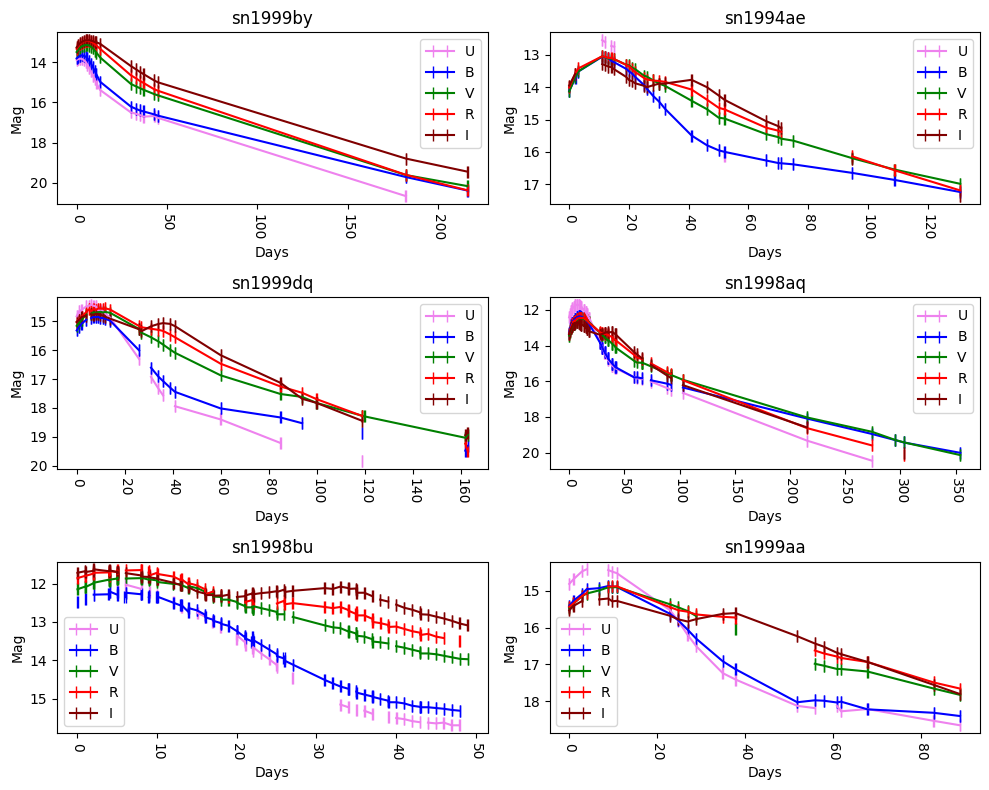

In [81]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = glob.glob("Supernova_all/cfalc_allsn/*_UBVRI.dat")
plt.figure(figsize=(10, 8))
i=0

for file in dataset:
    try:
        # Read the data file into a DataFrame
        df = pd.read_table(file, comment="#", sep="[ \t]+", engine="python", header=0, names=["HJD", "U", "Uerr", "B", "Berr", "V", "Verr", "R", "Rerr", "I", "Ierr"])

        # plot only, if 20+ observations are available
        if len(df) >= 20:
            i+=1
            plt.subplot(3,2,i)
            # Replace missing data with NaN
            df[df == 99.999] = float("NaN")
            df[df == 99.99] = float("NaN")
            # convert HJD to days from first observation
            df["HJD"]-= df["HJD"].iat[0]
            
            # Plot light curves for each filter
            for filter, color in [["U", "violet"], ["B", "blue"], ["V", "green"], ["R", "red"], ["I", "#800000"]]:
                plt.errorbar(df["HJD"].values, df[filter].values, label=filter, color=color, xerr=df[filter+"err"].values, capsize=4)

        
            plt.title(file[26:34])
            plt.xlabel("Days")
            plt.ylabel("Mag")
            plt.xticks(rotation=270)
            plt.gca().invert_yaxis()
            plt.legend()
           
            
        
    except Exception as e:
        print(f"{file} ignored due to error: {e}")

plt.tight_layout()
plt.show()


We observe that the brightness of each SNe peaks and then decreases over time. Since the dataset includes every type of SN, each with its own characteristic light curve, we cannot directly compare them without knowing their types. Moreover, only Type Ia SNe have standardizable light curves and can be used as standard candles. Therefore, we will use the dataset containing only known SNe Ia going forward.

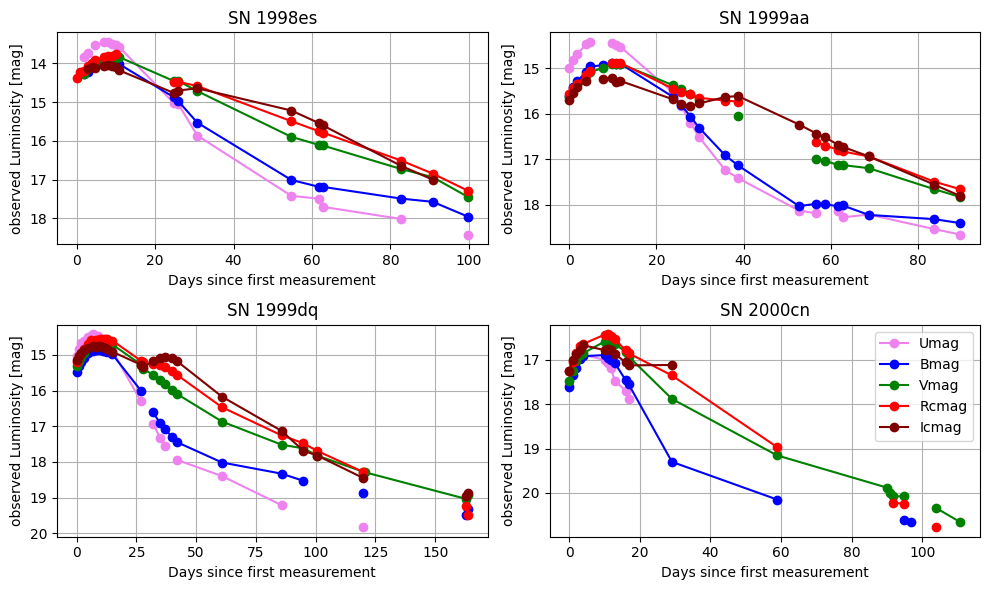

In [82]:
column_names = ["SN", "HJD", "Umag", "e_Umag", "Bmag", "e_Bmag", 
                "Vmag", "e_Vmag", "Rcmag", "e_Rcmag", "Icmag", "e_Icmag", "Det_Filt"]
colspecs = [(0, 9), (10, 20), (21, 27), (28, 33), (34, 40), (41, 46), 
            (47, 53), (54, 59), (60, 66), (67, 72), (73, 79), (80, 85), (86, 110)]

i=0
df = pd.read_fwf("Supernova_Ia/table4.dat", colspecs=colspecs, names=column_names, na_values="?")
plt.figure(figsize=(10, 6))

grouped = df.groupby("SN")

for sn_name, sn_data in grouped:
    if len(sn_data)>=20:
        i+=1
        plt.subplot(2,2,i)

        sn_data = sn_data.sort_values("HJD")  
        sn_data["Days"] = sn_data["HJD"] - sn_data["HJD"].min()

        filters = {"Umag": "violet", "Bmag": "blue", "Vmag": "green", "Rcmag": "red", "Icmag": "#800000"}

        for filter, color in filters.items():
            if not sn_data[filter].isna().all():  
                plt.plot(sn_data["Days"], sn_data[filter], label=filter, color=color, marker="o", linestyle="-")

        plt.gca().invert_yaxis()  
        plt.xlabel("Days since first measurement")
        plt.ylabel("observed Luminosity [mag]")
        plt.title(f"{sn_name}")
        plt.grid(True)

plt.legend()
plt.tight_layout()
plt.show()


We observe a second maximum in the infrared filter measurements of Type Ia SNe. This is possibly due to the ionization evolution of iron group elements in the ejecta. This secondary maximum appears to be highly consistent in the brighter SNe, making them excellent candidates for standard candles. Moreover, observing SNe in the infrared largely eliminates uncertainties in the reddening corrections. However, SNe are typically quite dim in the infrared, which makes distant SNe harder to observe and presents a challenge for cosmological studies. [[5](#ref5)]

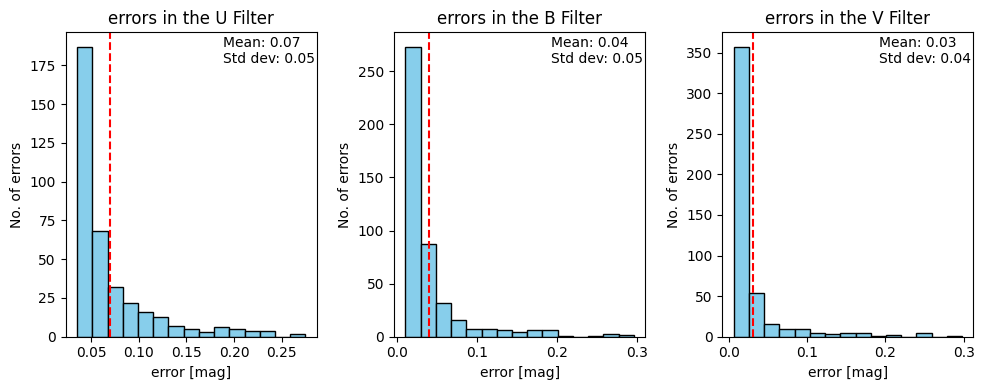

In [83]:
e_filters = ["e_Umag", "e_Bmag", "e_Vmag"]
i=0
plt.figure(figsize=(10, 4))
for f in e_filters:
    i+=1
    e_filter_df = df[f]
    mean = round(e_filter_df.mean(), 2)
    std = round(e_filter_df.std(), 2)
    plt.subplot(1,3,i)
    #plt.figure(figsize=(4, 3))
    plt.hist(e_filter_df, bins=15, color='skyblue', edgecolor='black')
    plt.xlabel(f'error [mag]')
    plt.ylabel('No. of errors')
    plt.title(f'errors in the {f[2:3]} Filter')
    plt.text(0.625 , 0.9 , f'Mean: {mean} \nStd dev: {std}', 
             transform=plt.gca().transAxes )
    plt.axvline(mean, color = 'red', linestyle = 'dashed')
plt.tight_layout()
plt.show()

We observe a power law distribution of errors in all filters, with only the first three plotted. This indicates that small errors are most common, which is typical for measurements with a large signal-to-noise ratio in photometry.

## 3. Statistical Inference
With the Phillips Relation, we can determine the absolute magnitude of a Type Ia supernova. The relationship is defined for three different filters: B, V, and I, each with its own set of parameters. [[6](#ref6)] We chose the equation for the V filter, as it is less affected by extinction than the B filter. Ideally, we would select the I filter to minimize extinction. However, Type Ia SNe do not peak at a specific luminosity in the I band, making them difficult to compare to one another.

$M_V = -20.883 + 1.949 \cdot \Delta m_{15}$

where:
- $M_V$ is the maximum absolute luminosity in the V filter,
- $\Delta m_{15}$ is the change in brightness in the V filter 15 days after the maximum.

We will use the absolute magnitude and distance calculated in the following code to analyze our data and conduct statistical tests.

In [84]:
from scipy.interpolate import CubicSpline

Mags_Delm15 = []

def phillips_relation(delta_m_15):
    M_max_I = -20.883 + 1.949*delta_m_15
    return M_max_I

for sn_name, sn_data in grouped:
    try:
        sn_data = sn_data.dropna(subset=["HJD", "Vmag"])

        # Find time of maximum brightness and corresponding magnitude
        start_idx = sn_data["HJD"].idxmin() # Index of first item of specific SN 
        max_idx = sn_data["Vmag"].idxmin() # Index of maximum brightness
        max_idx = max_idx - start_idx #index correction, df -> sn df index
        max_day = float(sn_data["HJD"].iat[max_idx]) # Date of maximum brightness 
        m_i_max = float(sn_data["Vmag"].iat[max_idx]) # Max brightness
        max_day15 = max_day + 15 # Date 15 days after maximum
        jd_known = sn_data["HJD"].values
        mag_known = sn_data["Vmag"].values
        spl = CubicSpline(jd_known,mag_known)
        m_i_15 = spl(max_day15) # Interpolate an approximate value for mag on 15th day

        # Calculate ∆m15
        delta_m15 = m_i_15 - m_i_max
        #print("SN", sn_name)
        #print("max apparent Imag:", m_i_max)
        M_I = phillips_relation(delta_m15) 
        #print("Absolute mag:", M_I, "mag")

        # distance to the supernova
        mu = m_i_max - M_I
        distance_pc = 10 ** ((mu + 5) / 5)
        distance_mpc = distance_pc/(10**6)
        #print("distance:", distance_mpc, "Mpc")

        if M_I > (-22) and M_I < (-15):
            Mags_Delm15.append((M_I, m_i_max, delta_m15, distance_mpc)) #max abs, max obs, del m 15, dist [Mpc]
        else:
            print('Outlier skipped')
        #print()

    except Exception as oops:
        print(f"{sn_name} ignored due to error: {oops}")



# Creates numpy array out of list for plotting/ data analysis
data_array = np.array(Mags_Delm15)

max_abs_mag = data_array[:,0]
max_obs_mag = data_array[:,1]
del_m = data_array[:,2]
dist = data_array[:,3]



### Combined quantity data plot

We expect SNe to become fainter with distance, hence the Distance vs. Observed Luminosity plot. The data points show a relatively strong correlation, and the relationship appears to be linear.

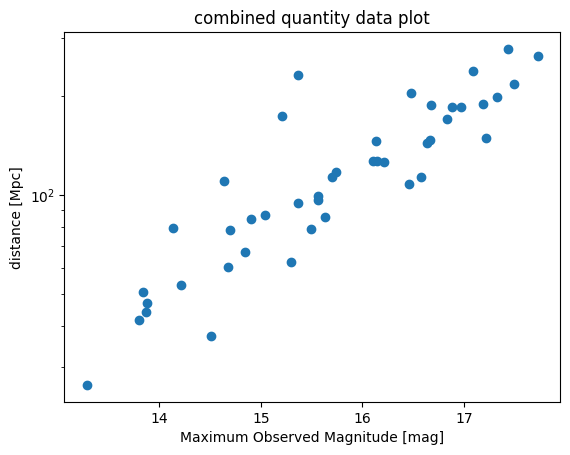

In [85]:
plt.scatter(max_obs_mag, dist)
plt.semilogy()
plt.xlabel('Maximum Observed Magnitude [mag]')
plt.ylabel('distance [Mpc]')
plt.title('combined quantity data plot')

plt.show()

### Analysing the distribution of Maximum Absolute Magnitudes 

Mean =  -19.39819851926804
Standard deviation =  0.35286031957570085
1-sigma Confidence Interval: (-19.75105883884374, -19.04533819969234)


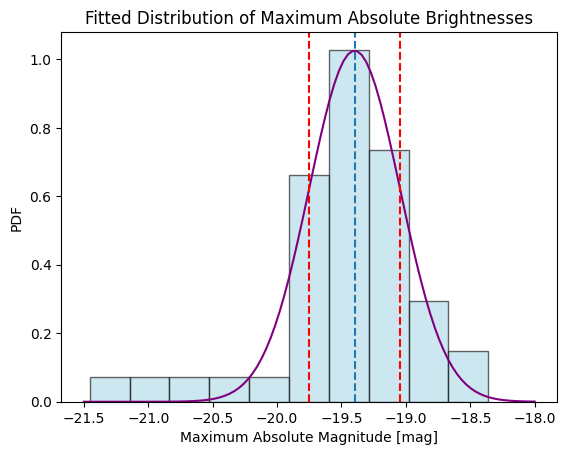

In [86]:
from scipy.optimize import curve_fit

counts, bins, patches = plt.hist(max_abs_mag, bins = 10, edgecolor='black', color = 'lightblue', density = True, alpha=0.6, label = 'SNe')

plt.xlabel('Maximum Absolute Magnitude [mag]')
plt.ylabel('PDF')
plt.title('Fitted Distribution of Maximum Absolute Brightnesses')


#define function to fit
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

#calculate bin center to use as y data to fit
bins = (bins[:-1] + np.diff(bins) / 2)

#create an arbitrary x axis to fit
x_values_to_fit = np.linspace(-21.5,-18,100)

# fit the data and plot the result
param, cov = curve_fit(gaussian, bins,counts, p0=[1, np.mean(max_abs_mag), np.std(max_abs_mag)])
plt.plot(x_values_to_fit, gaussian(x_values_to_fit, *param), '-', color = 'purple', lw=1.5)

# access fit parameters
mean_gaus = param[1] #mean of gaussian dist
std_gaus   = param[2] #stdev of the dist

print('Mean = ', mean_gaus)
print('Standard deviation = ', std_gaus)
print(f"1-sigma Confidence Interval: ({mean_gaus-std_gaus}, {mean_gaus+std_gaus})")

plt.axvline(mean_gaus, linestyle = 'dashed')
plt.axvline(mean_gaus - std_gaus, color = 'red', linestyle = 'dashed')
plt.axvline(mean_gaus + std_gaus, color = 'red', linestyle = 'dashed')

plt.show()

The distribution of absolute luminosities of SNe Ia seems to follow a Gaussian distribution. We calculated the mean to be around -19.4 mag. Comparing this to the maximum absolute luminosity of -19.5 mag found in the literature, our mean is very close. [[7](#ref7)]

2.5-sigma Confidence Interval: (-20.28, -18.52)


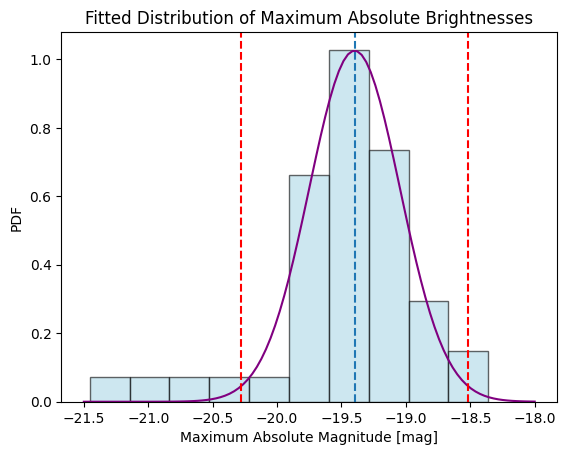

In [87]:
def n_sigma_confidence_interval(sigma, mu, n):
    lower_bound = mu - n * sigma
    upper_bound = mu + n * sigma
    
    return lower_bound, upper_bound


n = 2.5

lower, upper = n_sigma_confidence_interval(std_gaus, mean_gaus, n)

print(f"{n}-sigma Confidence Interval: ({lower:.2f}, {upper:.2f})")


# Fitted histogram plotting

counts, bins, patches = plt.hist(max_abs_mag, bins = 10, edgecolor='black', color = 'lightblue', density = True, alpha=0.6, label = 'SNe')

plt.xlabel('Maximum Absolute Magnitude [mag]')
plt.ylabel('PDF')
plt.title('Fitted Distribution of Maximum Absolute Brightnesses')


plt.plot(x_values_to_fit, gaussian(x_values_to_fit, *param), '-', color = 'purple', lw=1.5)


plt.axvline(mean_gaus, linestyle = 'dashed')
plt.axvline(lower, color = 'red', linestyle = 'dashed')
plt.axvline(upper, color = 'red', linestyle = 'dashed')

plt.show()

Next, we calculated the $2.5 \sigma$ confidence interval. $2.5 \sigma$ was chosen because it offers a good balance between the strictness of $3 \sigma$ and the uncertainty of $2 \sigma$. The literature value of -19.5 is still well within our confidence interval; therefore, our result is not statistically significantly different.

## 4. Hypothesis Testing

To test several hypotheses, we were asked to create a combined quantity data plot. Unfortunately, we didn't find any straightforward options, so we had to use a less traditional approach. In the first half of this subsection, we will discuss the combined quantity data plot "Distance in Mpc vs. Maximum Observed Brightness." We defined our combined quantity as:

$X:= \frac{\text{log}_{10}(d)}{m}$

where:
- $X$ is the combined data quantity in $\text{log}_{10}(\text{Mpc})$
- $m$ is the maximum observed luminosity in the V filter
- $d$ is the distance in Mpc that we calculated with the help of the Phillips relationship and the distance modulus formula

We chose to take the logarithm of $d$, rather than the power of $m$, because otherwise most data points would cluster at the bottom left of the graph, except for a few outliers. This would have made the graph difficult to interpret.

As a refresher, here is the plot:

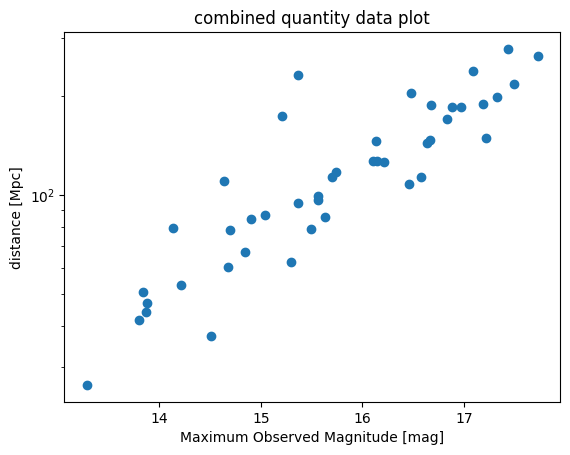

In [88]:
plt.scatter(max_obs_mag, dist)
plt.semilogy()
plt.xlabel('Maximum Observed Magnitude [mag]')
plt.ylabel('distance [Mpc]')
plt.title('combined quantity data plot')

plt.show()

We expected a strong correlation between these two measurements, as we aim to use Type Ia supernovae to determine the distance to distant galaxies. Our goal is to assess whether the spread of the data is statistically significant. We define our hypotheses as follows:

- $H_0$: The value of X can be considered constant for all SNe Ia

- $H_a$: The value of X can NOT be considered constant for all SNe Ia

To test this hypothesis, we generate a random subset (with replacement) and compare it to the original dataset.

In [89]:
idx = np.random.randint(44, size=22)
sub_data = data_array[idx,:]
#print(sub_data)
#max abs mag   max obs mag    del m     distance

Now we calculate $X:= \frac{\text{log}_{10}(d)}{m}$ for both the subset and the original dataset. We chose $\text{log}_{10}(d)$ as the numerator and $m$ as the denominator because we wanted $X$ to represent an estimate of the slope of the best fit line, since the slope is dy/dx. Of course, this wouldn't be an exact estimate, as linear regression considers all data points collectively, but it's a good estimate to illustrate that as the magnitude increases (the SN gets fainter), the distance of the SN also increases, and vice versa. The best fit line will be discussed in Section 5, "Linear Regression." For now, we will return to our hypothesis testing.

In [90]:
X_sub = np.divide(np.log10(sub_data[:,3]),sub_data[:,1])
X_data = np.divide(np.log10(data_array[:,3]), data_array[:,1])
#print(X_sub)
#print(X_data)

Our values for $X$ seem to cluster around 0.12. Next, we will compare the histograms of both datasets and test whether the two sets differ from one another.


Entire data set stats:
 Mean:  0.12915844676597166 
 Standard deviation 0.008750944083704961
Subset data stats:
 Mean:  0.1273835183273045 
 Standard deviation 0.006753589746735648


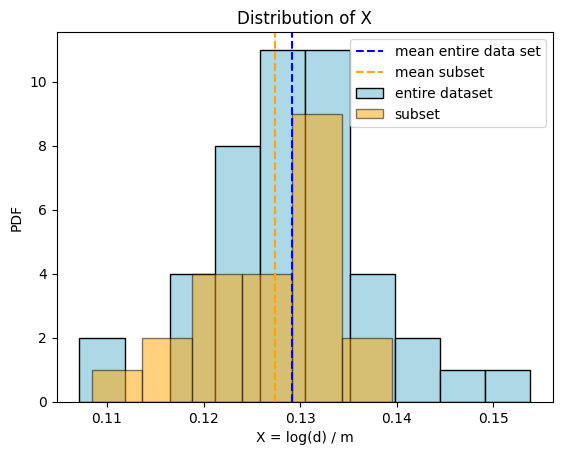

In [91]:
plt.hist(X_data, bins=10, edgecolor = 'black', color = 'lightblue', alpha=1)
plt.hist(X_sub, bins=6, edgecolor = 'black', color = 'orange', alpha=0.5)

mean_X_data = np.mean(X_data)
mean_X_sub = np.mean(X_sub)
std_X_data = np.std(X_data)
std_X_sub = np.std(X_sub)
print('Entire data set stats:\n Mean: ', mean_X_data, '\n Standard deviation', std_X_data)
print('Subset data stats:\n Mean: ', mean_X_sub, '\n Standard deviation', std_X_sub)

plt.axvline(mean_X_data, color = 'blue', linestyle = 'dashed')
plt.axvline(mean_X_sub, color = 'orange', linestyle = 'dashed')
plt.xlabel('X = log(d) / m')
plt.ylabel('PDF')
plt.title('Distribution of X')
plt.legend(['mean entire data set', 'mean subset', 'entire dataset', 'subset'], loc = "upper right")

plt.show()

#### Two-Sample t-Test

For hypothesis testing, we chose the parametric two-sample t-test to compare the means of two populations. We did not assume equal population variances or equal population sizes. If the means are significantly different, then we cannot assume $X$ to be constant.

In [92]:
from scipy.stats import ttest_ind

n_1 = len(X_sub)
n_2 = len(X_data)
#t_stat, p_val = ttest_ind(X_data, X_sub)
t_stat, p_val = ttest_ind(X_data, X_sub, equal_var=False)
print('t statistic = ', t_stat)
print('p value = ', p_val)

t statistic =  0.8927404332346857
p value =  0.3760806681946005


We test our hypothesis with $2.5\sigma$ confidence, corresponding to a 98.758% confidence level and a significance level of $\alpha$ = 0.01242. The p-value calculated by the t-test tells us the area under the curve that allows us to reject $H_0$. If $p < \alpha$, we may reject $H_0$.


In [93]:
if (p_val < 0.01242):
    print('We can reject H_0')
else:
    print('We can NOT reject H_0')

We can NOT reject H_0


$H_0$: The value of X can be considered constant for all SNe Ia

$H_a$: The value of X can NOT be considered constant for all SNe Ia

Since we cannot reject $H_0$​, this means that the ratio between the observed magnitude and the distance to a supernova is constant and does not vary significantly. This is a positive result for us because it indicates that Type Ia SNe indeed have a constant peak brightness. Therefore, we can use these cosmic events to determine distances.

#### KS Test
Another test we could perform is a non-parametric, two-tailed Kolmogorov-Smirnov (KS) test to analyze whether the two samples differ from one another. Since we have a large sample size, we used the critical value table from Lecture 7+8, slide 80. We chose a significance level of $\alpha = 0.01$ since a formula for $2.5\sigma$ was not available. This significance level is a bit stricter than $2.5\sigma$.

In [94]:
from scipy.stats import ks_2samp
ks_stat, p_val_ks = ks_2samp(X_data, X_sub)
crit = 1.63*np.sqrt((n_1+n_2)/(n_1*n_2))

if (ks_stat < crit):
    print('We can NOT reject H_0')
else:
    print('We can reject H_0')

We can NOT reject H_0


The KS test delivered the same result as the t-test.

### Absolute Magnitude
#### One-Sample Test ($\mu_1=\mu_2$)
Another meaningful hypothesis we can test is whether the value of -19.5 mag [[7](#references)], often found in the literature for SNe Ia, is significantly different from our calculated values. To do this, we perform a one-sample parametric test and compare the means.

In [95]:
from scipy.stats import ttest_1samp

def hypothesis_test(sample_mean, sample_std, data, hypothesized_mean=-19.5, alpha=0.01242):
    
    sample_size = len(data)

    # Perform a one-sample t-test
    t_stat, p_value = ttest_1samp(data, hypothesized_mean)

    # Print the results
    print(f"Sample Mean: {sample_mean:.2f}")
    print(f"Sample Standard Deviation: {sample_std:.2f}")
    print(f"Sample Size: {sample_size}")
    print(f"T-Statistic: {t_stat:.2f}")
    print(f"P-Value: {p_value:.4f}")
    print(f"Interval: ({sample_mean-2.5*sample_std/np.sqrt(sample_size)},{sample_mean+2.5*sample_std/np.sqrt(sample_size)})")

    # Decision rule
    if p_value < alpha:
        print(f"Result: Reject the null hypothesis (H₀), The mean is significantly different from {hypothesized_mean}.")
    else:
        print(f"Fail to reject the null hypothesis (H₀): The mean is NOT significantly different from {hypothesized_mean}.")
    

    
hypothesis_test(mean_gaus, std_gaus, max_abs_mag)


Sample Mean: -19.40
Sample Standard Deviation: 0.35
Sample Size: 44
T-Statistic: 0.47
P-Value: 0.6421
Interval: (-19.5311877560223,-19.265209282513776)
Fail to reject the null hypothesis (H₀): The mean is NOT significantly different from -19.5.


The hypothesis test suggests that we can not reject $H_0$​, and the theoretical value of -19.5 is consistent with our calculations. This is a positive result because it aligns well with established science.

## 5. Linear Regression
In the following section, we will attempt to fit a linear model to our combined quantity data plot. A recurring problem is that we only have distances calculated from the Phillips Relation, and we cannot directly compare them to check if they are correct.

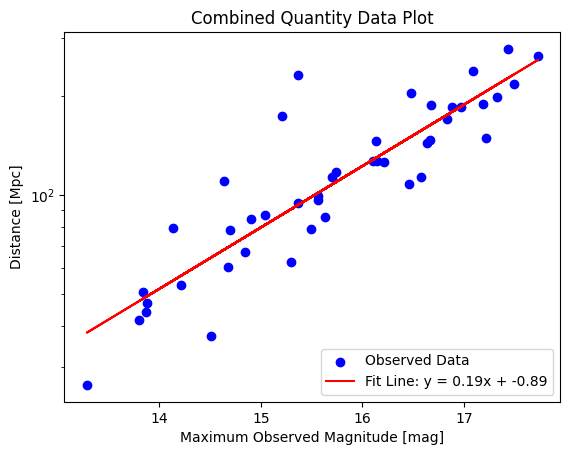

Error:0.014898197098827544


In [96]:
from scipy.stats import linregress

# Perform linear regression (on a log scale for the distances)
log_dist = np.log10(dist)  # Convert distances to log10 scale
slope_bestfit, intercept, r_value, p_value, std_err = linregress(max_obs_mag, log_dist)

# Generate the best-fit line
fit_line = slope_bestfit * np.array(max_obs_mag) + intercept

# Convert the fit line back to the original scale
fit_line_exp = 10**fit_line

# Plot the scatter points
plt.scatter(max_obs_mag, dist, label='Observed Data', color='blue')

# Plot the fitted line
plt.plot(max_obs_mag, fit_line_exp, label=f'Fit Line: y = {slope_bestfit:.2f}x + {intercept:.2f}', color='red')

# Set logarithmic scale for the y-axis
plt.semilogy()

# Add labels and title
plt.xlabel('Maximum Observed Magnitude [mag]')
plt.ylabel('Distance [Mpc]')
plt.title('Combined Quantity Data Plot')
plt.legend()

# Show the plot
plt.show()

print(f"Error:{std_err}")


This line attempts to fit the logarithm of the distance to magnitudes (since magnitude is logarithmic). The idea behind this is that if SNe Ia have a somewhat constant peak luminosity, their brightness should change in a relatively constant manner depending on the distance.

The line fits our dataset as well as possible, but it remains difficult to fully justify this relation.

Now, we will calculate some values that provide insight into the correlation:

In [97]:
from scipy.stats import pearsonr


mean_dist = np.mean(log_dist)
mean_obs_mag = np.mean(max_obs_mag) 
n = len(log_dist)

cov_xy = np.sum((max_obs_mag - mean_obs_mag) * (log_dist - mean_dist)) / (n - 1)

coeff, p_val = pearsonr(max_obs_mag, log_dist)

print(f"Covaraince = {cov_xy}")
print(f'Pearson Coefficient = {coeff}')

Covaraince = 0.26280760679357235
Pearson Coefficient = 0.8878825187092749


A positive covariance indicates that when x increases, y tends to increase as well.

A positive Pearson coefficient suggests a positive slope, which is indeed the case for our data (see plot). A value of approximately 0.89 indicates a relatively strong correlation between our data points.

### Bootstrap Method
Next, we perform the bootstrap method to calculate a distribution of parameters that fit our data. This method generates a random data sample (with replacement) from the original sample and fits the best linear relationship to this new sample. We repeated this process 1,000 times to ensure the robustness of our results.

Bootstrap 1-sigma interval for the slope: (0.1736, 0.1978)
removing 159 lowest and highest estimates
Mean slope: 0.1860


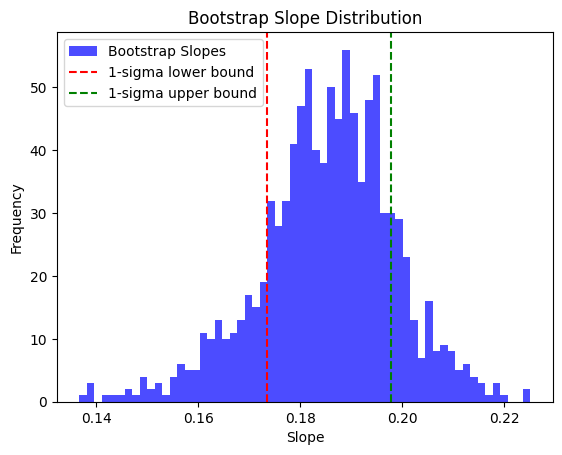

In [98]:
import random
#Number of bootstrap samples
n_bootstrap = 1000
N= len(max_obs_mag)


# Store bootstrap slopes
bootstrap_slopes = []


# Perform bootstrap resampling
for _ in range(n_bootstrap):
    # Resample data with replacement
    indices = np.random.randint(0, N, N) 

    resampled_mag = max_obs_mag[indices]
    resampled_log_dist = log_dist[indices]
    
    # Fit linear regression to the resampled data
    coefficients = np.polyfit(resampled_mag, resampled_log_dist, deg=1)
    slope = coefficients[0]
    
    # Store the slope
    bootstrap_slopes.append(slope)


bootstrap_slopes = np.sort(bootstrap_slopes)

# Compute the 1-sigma interval (16th and 84th percentiles)
lower_bound = np.percentile(bootstrap_slopes, 16)
upper_bound = np.percentile(bootstrap_slopes, 84)

# Print results
print(f"Bootstrap 1-sigma interval for the slope: ({lower_bound:.4f}, {upper_bound:.4f})")

alpha= 0.318
remove= int(n_bootstrap*alpha/2)
print(f"removing {remove} lowest and highest estimates")
cut= bootstrap_slopes[remove:-remove]
print(f"Mean slope: {np.mean(cut):.4f}")

# Plot the distribution of bootstrap slopes
plt.hist(bootstrap_slopes, bins=60, alpha=0.7, color='blue', label='Bootstrap Slopes')
plt.axvline(lower_bound, color='red', linestyle='--', label='1-sigma lower bound')
plt.axvline(upper_bound, color='green', linestyle='--', label='1-sigma upper bound')
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.title('Bootstrap Slope Distribution')
plt.legend()
plt.show()


With the bootstrap method, we obtain a distribution of possible slopes and a confidence interval of approximately (0.17, 0.20) for the gradient of the slope.

We also fit a Gaussian around the slope distribution.

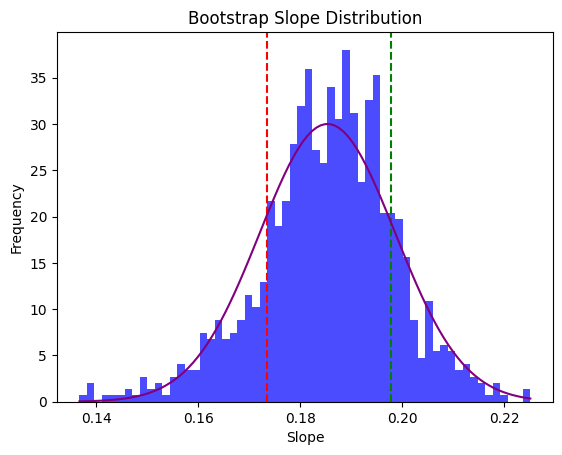

In [99]:
from scipy.stats import norm

plt.hist(bootstrap_slopes, bins=60, alpha=0.7, color='blue', label='Bootstrap Slopes', density=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='1-sigma lower bound')
plt.axvline(upper_bound, color='green', linestyle='--', label='1-sigma upper bound')
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.title('Bootstrap Slope Distribution')

# fit a gaussian distribution
x = np.linspace(min(bootstrap_slopes),max(bootstrap_slopes),100)
pdf= norm.pdf(x,np.mean(bootstrap_slopes),np.std(bootstrap_slopes))

plt.plot(x, pdf, 'purple')

plt.show()

We also performed hypothesis testing using the bootstrap method. Our goal is to test whether the slope of the best fit line is significantly different from a distribution of slopes obtained through bootstrap sampling. To do this, we ran the bootstrap method 100 times and recorded the mean slope each time. We set a confidence level of $2.5\sigma$
- $H_0$: the best fit slope is not different from our bootstrap slopes
- $H_a$: the best fit slope is different from our bootstrap slopes

In [100]:
n_bootstrap = 1000
N= len(max_obs_mag)

bootstrap_means = []

for i in range(100):
    bootstrap_slopes = []

    for _ in range(n_bootstrap):
        indices = np.random.randint(0, N, N) 
        resampled_mag = max_obs_mag[indices]
        resampled_log_dist = log_dist[indices]
        coefficients = np.polyfit(resampled_mag, resampled_log_dist, deg=1)
        slope = coefficients[0]
        bootstrap_slopes.append(slope)

    bootstrap_slopes = np.sort(bootstrap_slopes)
    alpha= 0.05
    remove= int(n_bootstrap*alpha/2)
    cut= bootstrap_slopes[remove:-remove]
    mean_slope = np.mean(cut)
    bootstrap_means.append(mean_slope)

bootstrap_means_array = np.array(bootstrap_means)

t_stat, p_value = ttest_1samp(bootstrap_means, slope_bestfit)
print("Bootstrap distribution mean: ", np.mean(bootstrap_means_array))
print(f"Interval: ({np.mean(bootstrap_means_array)-2.5*np.std(bootstrap_means_array)/np.sqrt(len(bootstrap_means))},{np.mean(bootstrap_means_array)+2.5*np.std(bootstrap_means_array)/np.sqrt(len(bootstrap_means))})")
if p_value < 0.01242:
        print(f"Result: Reject the null hypothesis (H₀), The bootstrap slope is significantly different from {slope_bestfit}.")
else:
        print(f"Fail to reject the null hypothesis (H₀): The bootstrap slope is not significantly different from {slope_bestfit}.")
    


Bootstrap distribution mean:  0.18582650572659024
Interval: (0.18572922574933523,0.18592378570384524)
Result: Reject the null hypothesis (H₀), The bootstrap slope is significantly different from 0.18633297466472545.


This test shows that the slope parameter fitted by the bootstrap method is significantly different from the best fit slope calculated earlier in this section, although the difference is only on the order of a thousandth of a unit. This rejection likely occurred because we repeated the sampling 1,000 times, which results in minimal variance in the bootstrap slope values. We conclude that this difference is not substantial, and to reconcile the two methods, we round the slope to 0.19.

## Conclusion
In this project, we explored the potential of Type Ia supernovae as standard candles for measuring cosmic distances. By examining their light curves and applying the Phillips relation, we confirmed that SNe Ia exhibit a consistent relationship between light curve width and peak luminosity, making them useful for distance estimation.

Our analysis included statistical methods, such as hypothesis testing and linear regression, to evaluate the relationship between the observed magnitude and the distance to the SN. Through the bootstrap method, we determined the distribution of possible slopes, and found a correlation between distance and observed luminosity, with a relatively constant peak brightness for SNe Ia. This consistency supports the use of SNe Ia as standardisable candles.

While we encountered challenges in comparing distances and magnitudes due to the limited direct measurement of distances, the confidence intervals and statistical tests provided evidence that the results are valid. The hypothesis tests confirmed that the slope of the best-fit line is consistent with the bootstrap distribution, and the small variance in slope differences highlighted the reliability of the methods.

In conclusion, Type Ia supernovae show great promise as a way to measure distances in the universe. By using SNe Ia as standard candles, we can more accurately estimate important cosmological parameters. The methods and analysis in this study confirm that SNe Ia are a useful tool in helping us better understand the expansion of the universe and other space-related phenomena.

## References

**[1]** Type Ia Supernova Explosions in Binary Systems: A Review (2023), Zheng-Wei Liu, Friedrich K. Röpke, Zhanwen Han

**[2]** UBVRI light curves of 44 type Ia supernovae (2006), Jha S. , Kirshner R.P., Challis P. et.al

**[3]** Type IA supernovae as standard candles (1992), Branch D. & Tammann G. A., 1992ARA&A..30..359B

**[4]** COSMOS - The SAO Encyclopedia of Astronomy
https://astronomy.swin.edu.au/cosmos/T/Type+Ia+Supernova+Light+Curves

**[5]** Secondary Maximum in the Near-Infrared Light Curves of Type Ia Supernovae (2006), Kasen D., 2006ApJ...649..939K

**[6]** The absolute Magnitudes of Type Ia Supernovae (1993), Phillips M. M., 1993ApJ...413L.105P

**[7]** Cepheid Calibration of the Peak Brightness of Type Ia Supernovae. IX. SN 1989B in NGC 3627 (1999), Saha A. et al, 1999ApJ...522..802S